# Complex Analysis

[Edward Lu](https://github.com/edwardlu71/notebooks)

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

### Generic Function of Domain Coloring Plot
   _color\_func_ is to be defined for different type of DC plotting

In [2]:
def Hcomplex(z):
    # computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

def func_vals(f, re, im,  N): 
    # evaluates the complex function at the nodes of the grid
    # re and im are tuples, re=(a, b) and im=(c, d), defining the rectangular region
    # N is the number of discrete points per unit interval 
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # horizontal resolution
    resH = N * h # vertical resolution
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    ### create a mesh grid
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    print("created mesh grid of horizontal x vertical {}x{} points with {} points/unit in zone re={} im={}".format(resL, resH, N, re, im))
    
    return f(z)

def plot_domain(color_func, f, re=[-1,1], im=[-1,1], title='', s=0.9, N=200, daxis=None):
    # calculate the function(f) value on mesh grid
    w = func_vals(f, re, im, N)
    print("calculated values on the mesh grid with the function defined in ", str(f))

    #  calculate the HSV color data for display with assigned domain coloring function (color_func)
    domc = color_func(w, s)
    print("calculated color data on the values with the color function defined in ", str(color_func))
    
    # plotting
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
        plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:34: DeprecationWarning: invalid escape sequence \I
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:34: DeprecationWarning: invalid escape sequence \I
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:34: DeprecationWarning: invalid escape sequence \I
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:34: DeprecationWarning: invalid escape sequence \I
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:34: DeprecationWarning: invalid escape sequence \I
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:34: DeprecationWarning: invalid escape sequence \I
<input>:33: DeprecationWarning: invalid escape sequence \R
<input>:34: DeprecationWarning: invalid escape sequence 

##### Phase plot of a complex function with contour lines of the modulus and the argument

In [3]:
def perfract(x, t, m, M):
    x = x / t
    return m + (M-m) * (x-np.floor(x))

In [4]:
def domaincol_co(w,s):
    H = Hcomplex(w) 
    m = 0.75 # brightness is restricted to [0.7,1]; interval suggested by E Wegert
    M = 1
    n = 30 # n=number of isochromatic lines per cycle 
    isol = perfract(H, 1.0/n, m, M) # isochromatic lines
    modul = np.absolute(w)
    logm = np.log(modul)
    logm = np.nan_to_num(logm) 
    modc = perfract(logm, 2*np.pi/n, m, M) # lines of constant log-modulus
   
    V = modc * isol 
    S = s * np.ones_like(H, float) 
    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
   
    return RGB

created mesh grid of horizontal x vertical 800x800 points with 200 points/unit in zone re=[-2, 2] im=[-2, 2]
calculated values on the mesh grid with the function defined in  <function <lambda> at 0x7f8486d18f28>
calculated color data on the values with the color function defined in  <function domaincol_co at 0x7f8486d20d08>


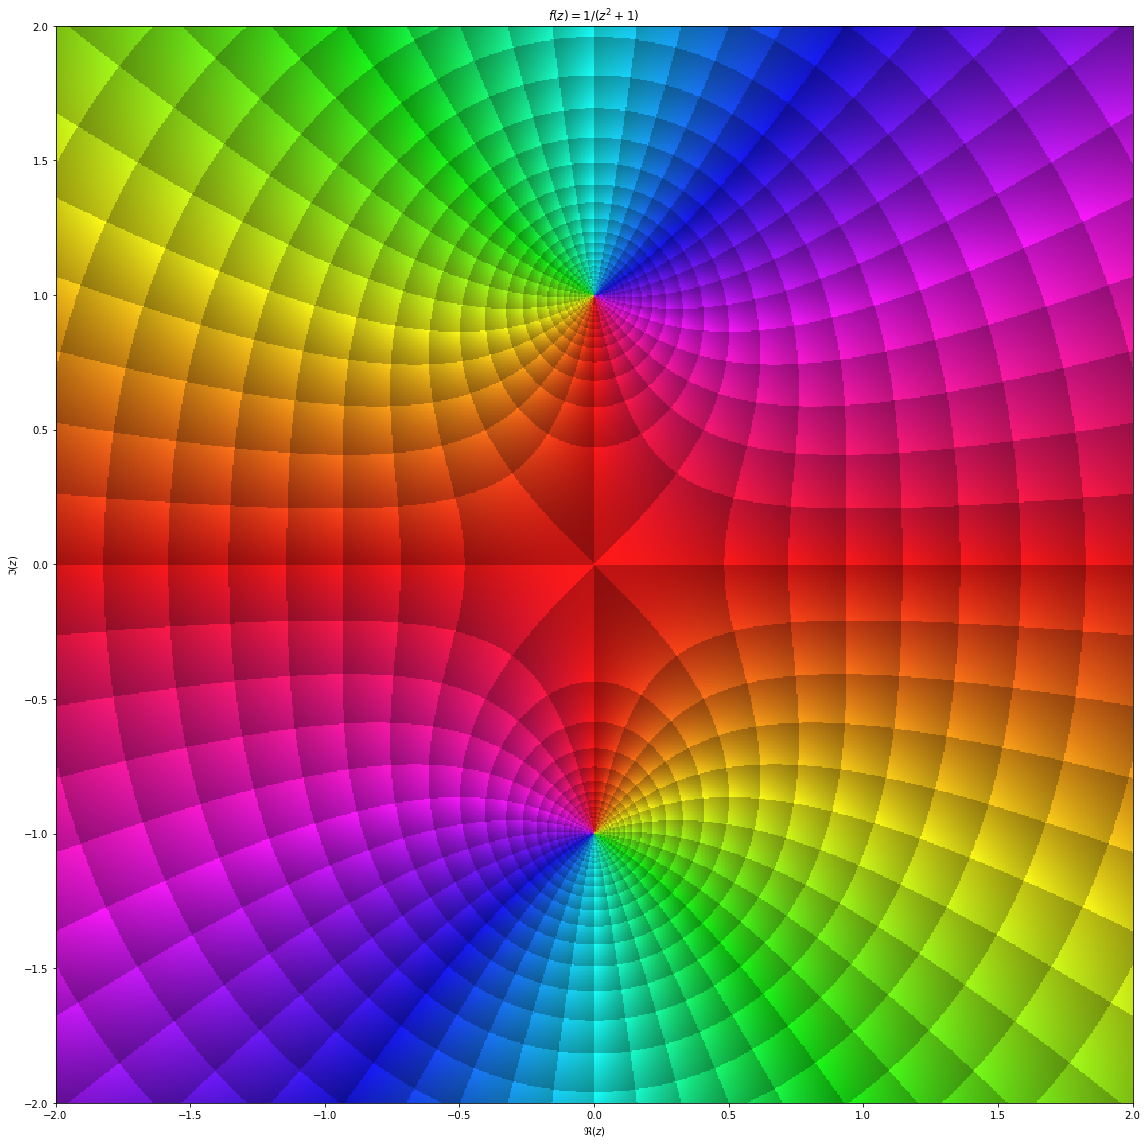

In [5]:
plt.rcParams['figure.figsize'] = 20, 16

ab = [-2, 2]
cd = [-2, 2]
#plt.subplot(1, 2, 1)
f = lambda z: 1/(z**2+1)
plot_domain(domaincol_co, f, re=ab, im=cd, title='$f(z)=1/(z^2+1)$', N=200, daxis=True)

plt.tight_layout()  

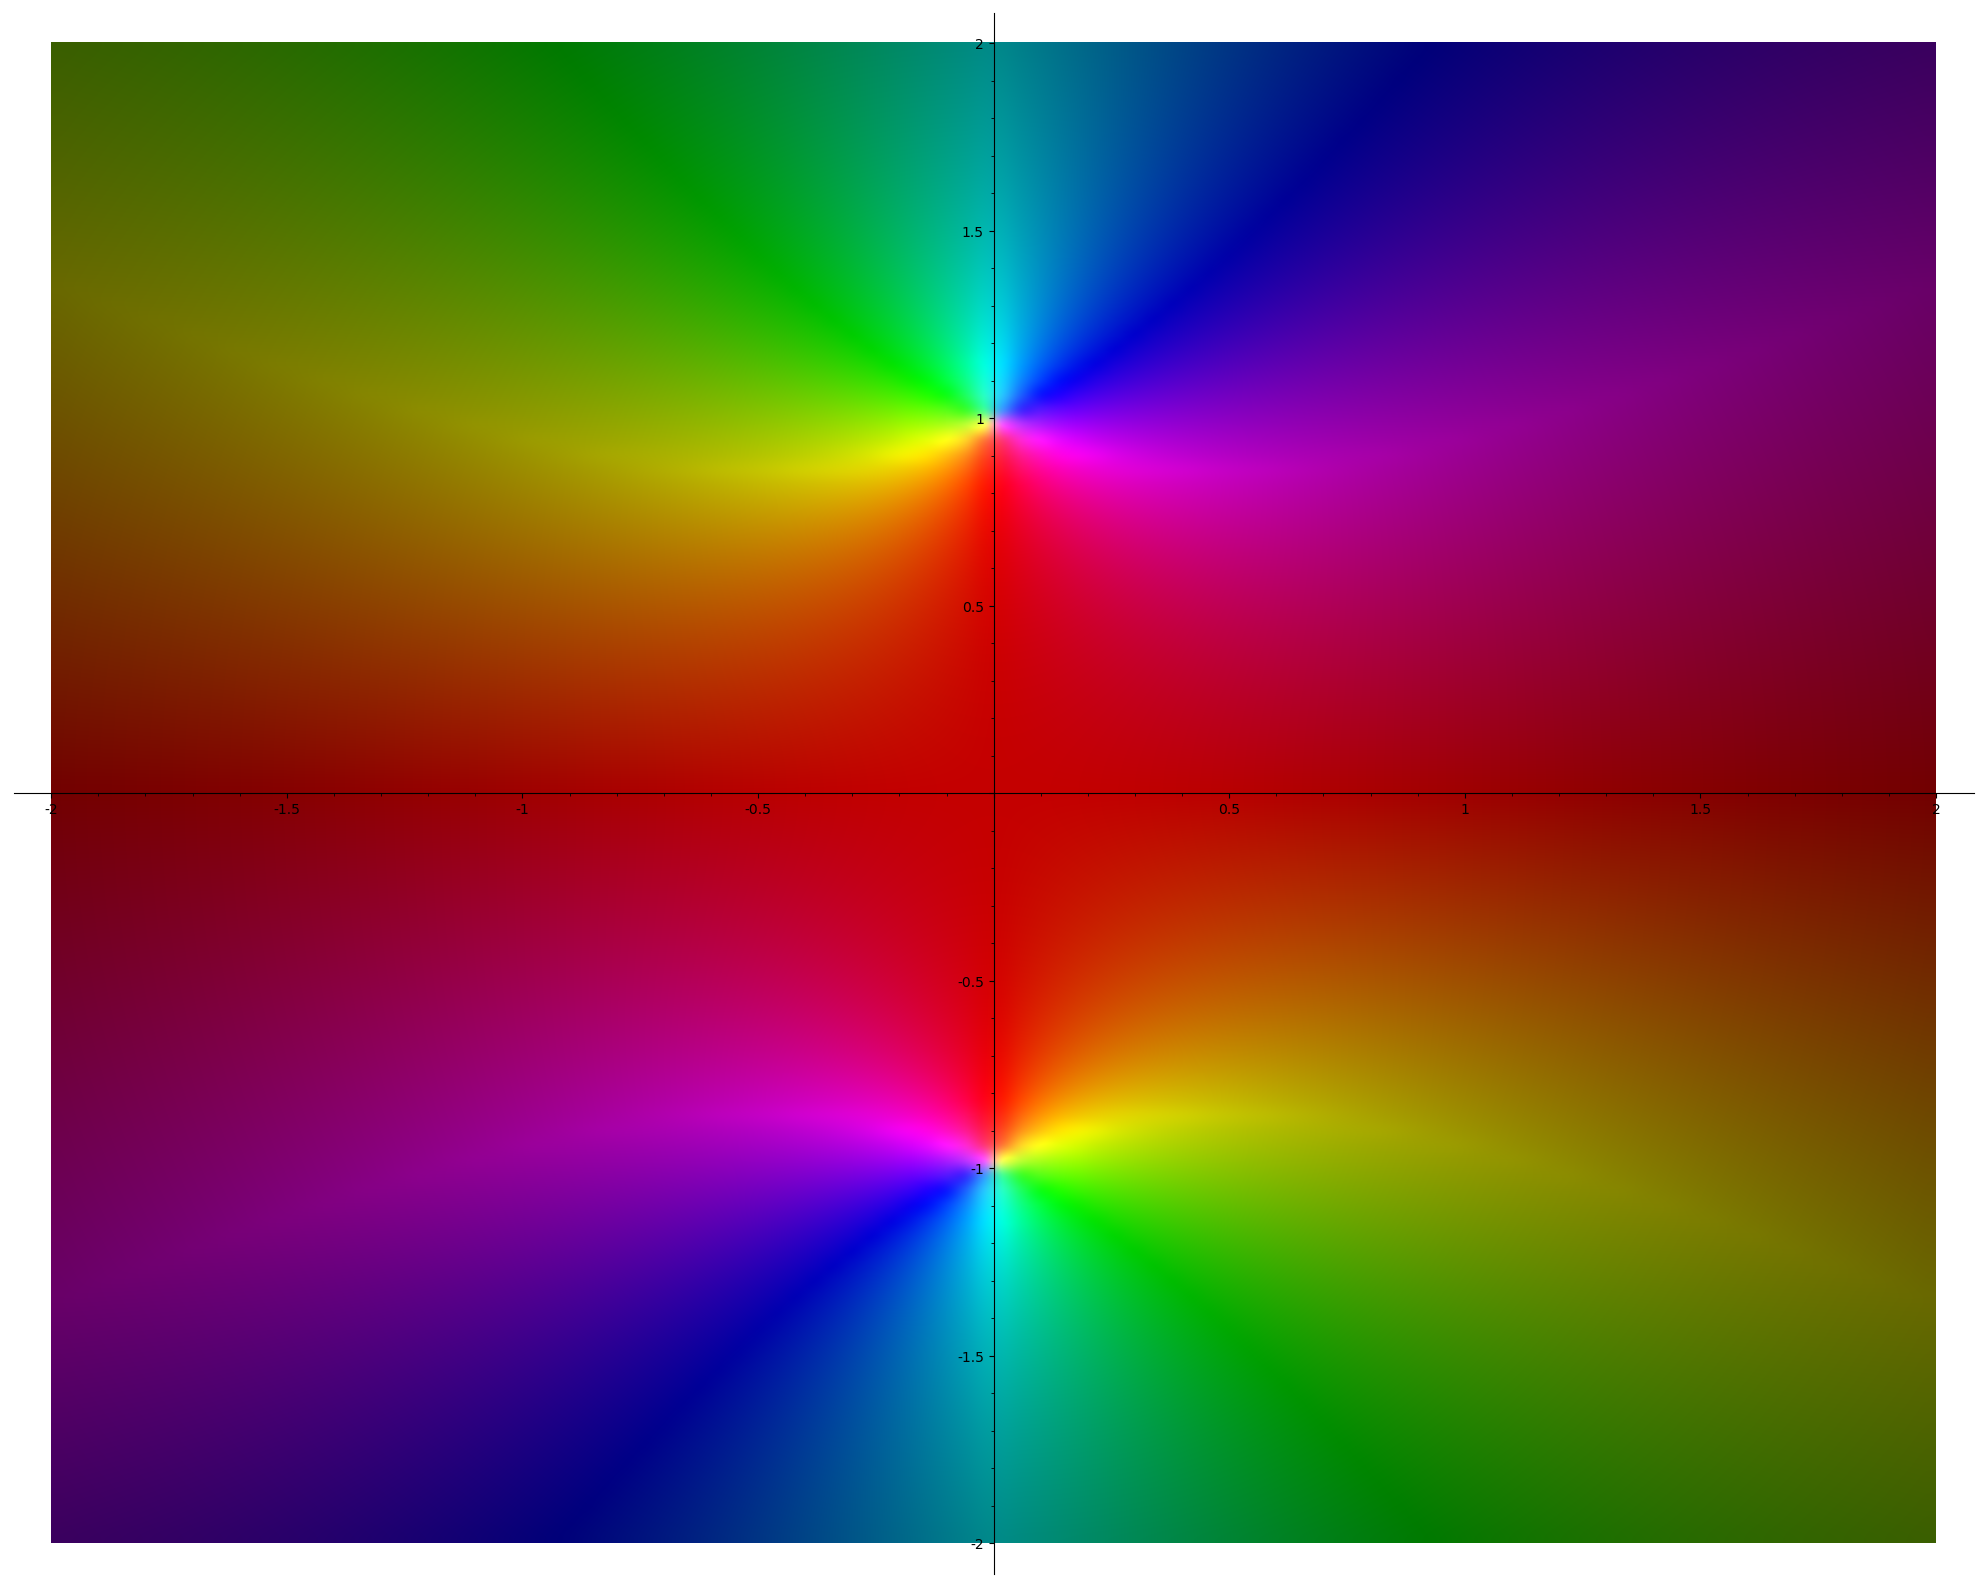

In [6]:
# sagemath call
complex_plot(lambda z: 1/(z^2+1), (-2,2), (-2,2))

### Residue
[wiki](https://en.wikipedia.org/wiki/Residue_(complex_analysis))

In [7]:
z = var("z",  domain=CC)
f = 1/(z^2+1)
# find the poles
(1/f == 0).solve(z)

[z == -I, z == I]

In [8]:
# select the first pole
pole = _[0].rhs()

In [9]:
# for simple pole
display((f*(z-pole)).limit(z=pole))
display(f.taylor(z,pole,-1)*(z-pole))

1/2*I

I*(z + I)/(2*z + 2*I)

In [10]:
# for non-simple pole
f(z=z+pole).taylor(z,0,-1).coefficient(z,-1)

1/2*I

## Complex functions

$$ z = x + i y $$
$$ f(z) = f(x + i y) = u(x, y) + i  v(x, y) $$

### Holomorphic functions
Complex functions that are differentiable at every point of an open subset $ \Omega $ of the complex plane are said to be holomorphic on $ \Omega $.

### Cauchy–Riemann equations

For holomorphic function, we have Cauchy–Riemann equations [proof](https://zh.wikipedia.org/wiki/%E6%9F%AF%E8%A5%BF%EF%BC%8D%E9%BB%8E%E6%9B%BC%E6%96%B9%E7%A8%8B)<br>
$$ \frac{\partial u}{\partial x} = \frac{\partial v}{\partial y} $$
$$ \frac{\partial u}{\partial y} = -\frac{\partial v}{\partial x} $$

### Cauchy's integral theorem
let U be an open subset of C which is simply connected, let f : U → C be a holomorphic function, and let $ \!\,\gamma $  be a rectifiable path in U whose start point is equal to its end point. Then [proof](https://en.wikipedia.org/wiki/Cauchy%27s_integral_theorem)

$$ \oint _{\gamma }f(z)\,dz=0 $$

### Cauchy's integral formula

Let U be an open subset of the complex plane C, and suppose the closed disk D defined as $ D={\bigl \{}z:|z-z_{0}|\leq r{\bigr \}}$ <br>
is completely contained in U. Let f : U → C be a holomorphic function, and let γ be the circle, oriented counterclockwise, forming the boundary of D. Then for every a in the interior of D, [proof](https://zh.wikipedia.org/wiki/%E6%9F%AF%E8%A5%BF%E7%A9%8D%E5%88%86%E5%85%AC%E5%BC%8F)

$$ f(a)={\frac {1}{2\pi i}}\oint _{\gamma }{\frac {f(z)}{z-a}}\,dz $$

### Laurent series

a representation of that function as a power series which includes terms of negative degree. It may be used to express complex functions in cases where a Taylor series expansion cannot be applied. Laurent series with complex coefficients are an important tool in complex analysis, especially to investigate the behavior of functions near singularities. 

$$ f(z)=\sum _{n=-\infty }^{\infty }a_{n}(z-c)^{n} $$

$$ a_{n}={\frac {1}{2\pi i}}\oint _{\gamma }{\frac {f(z)}{(z-c)^{n+1}}}\,dz $$

### Types of Singularities

* removeable singularity i.e. $ f(z) = sin(z)/z $ at z=0, it is removeable because if we _define_ f(0) = 1, it is holomorphic function on field CC
* a pole i.e. if  $ \lim _{z\to a}f(z) = \infty $
* essential singularity. i.e. $ f(z)=e^{1/z} $ at z=0, its neither a complex number nor a infinite

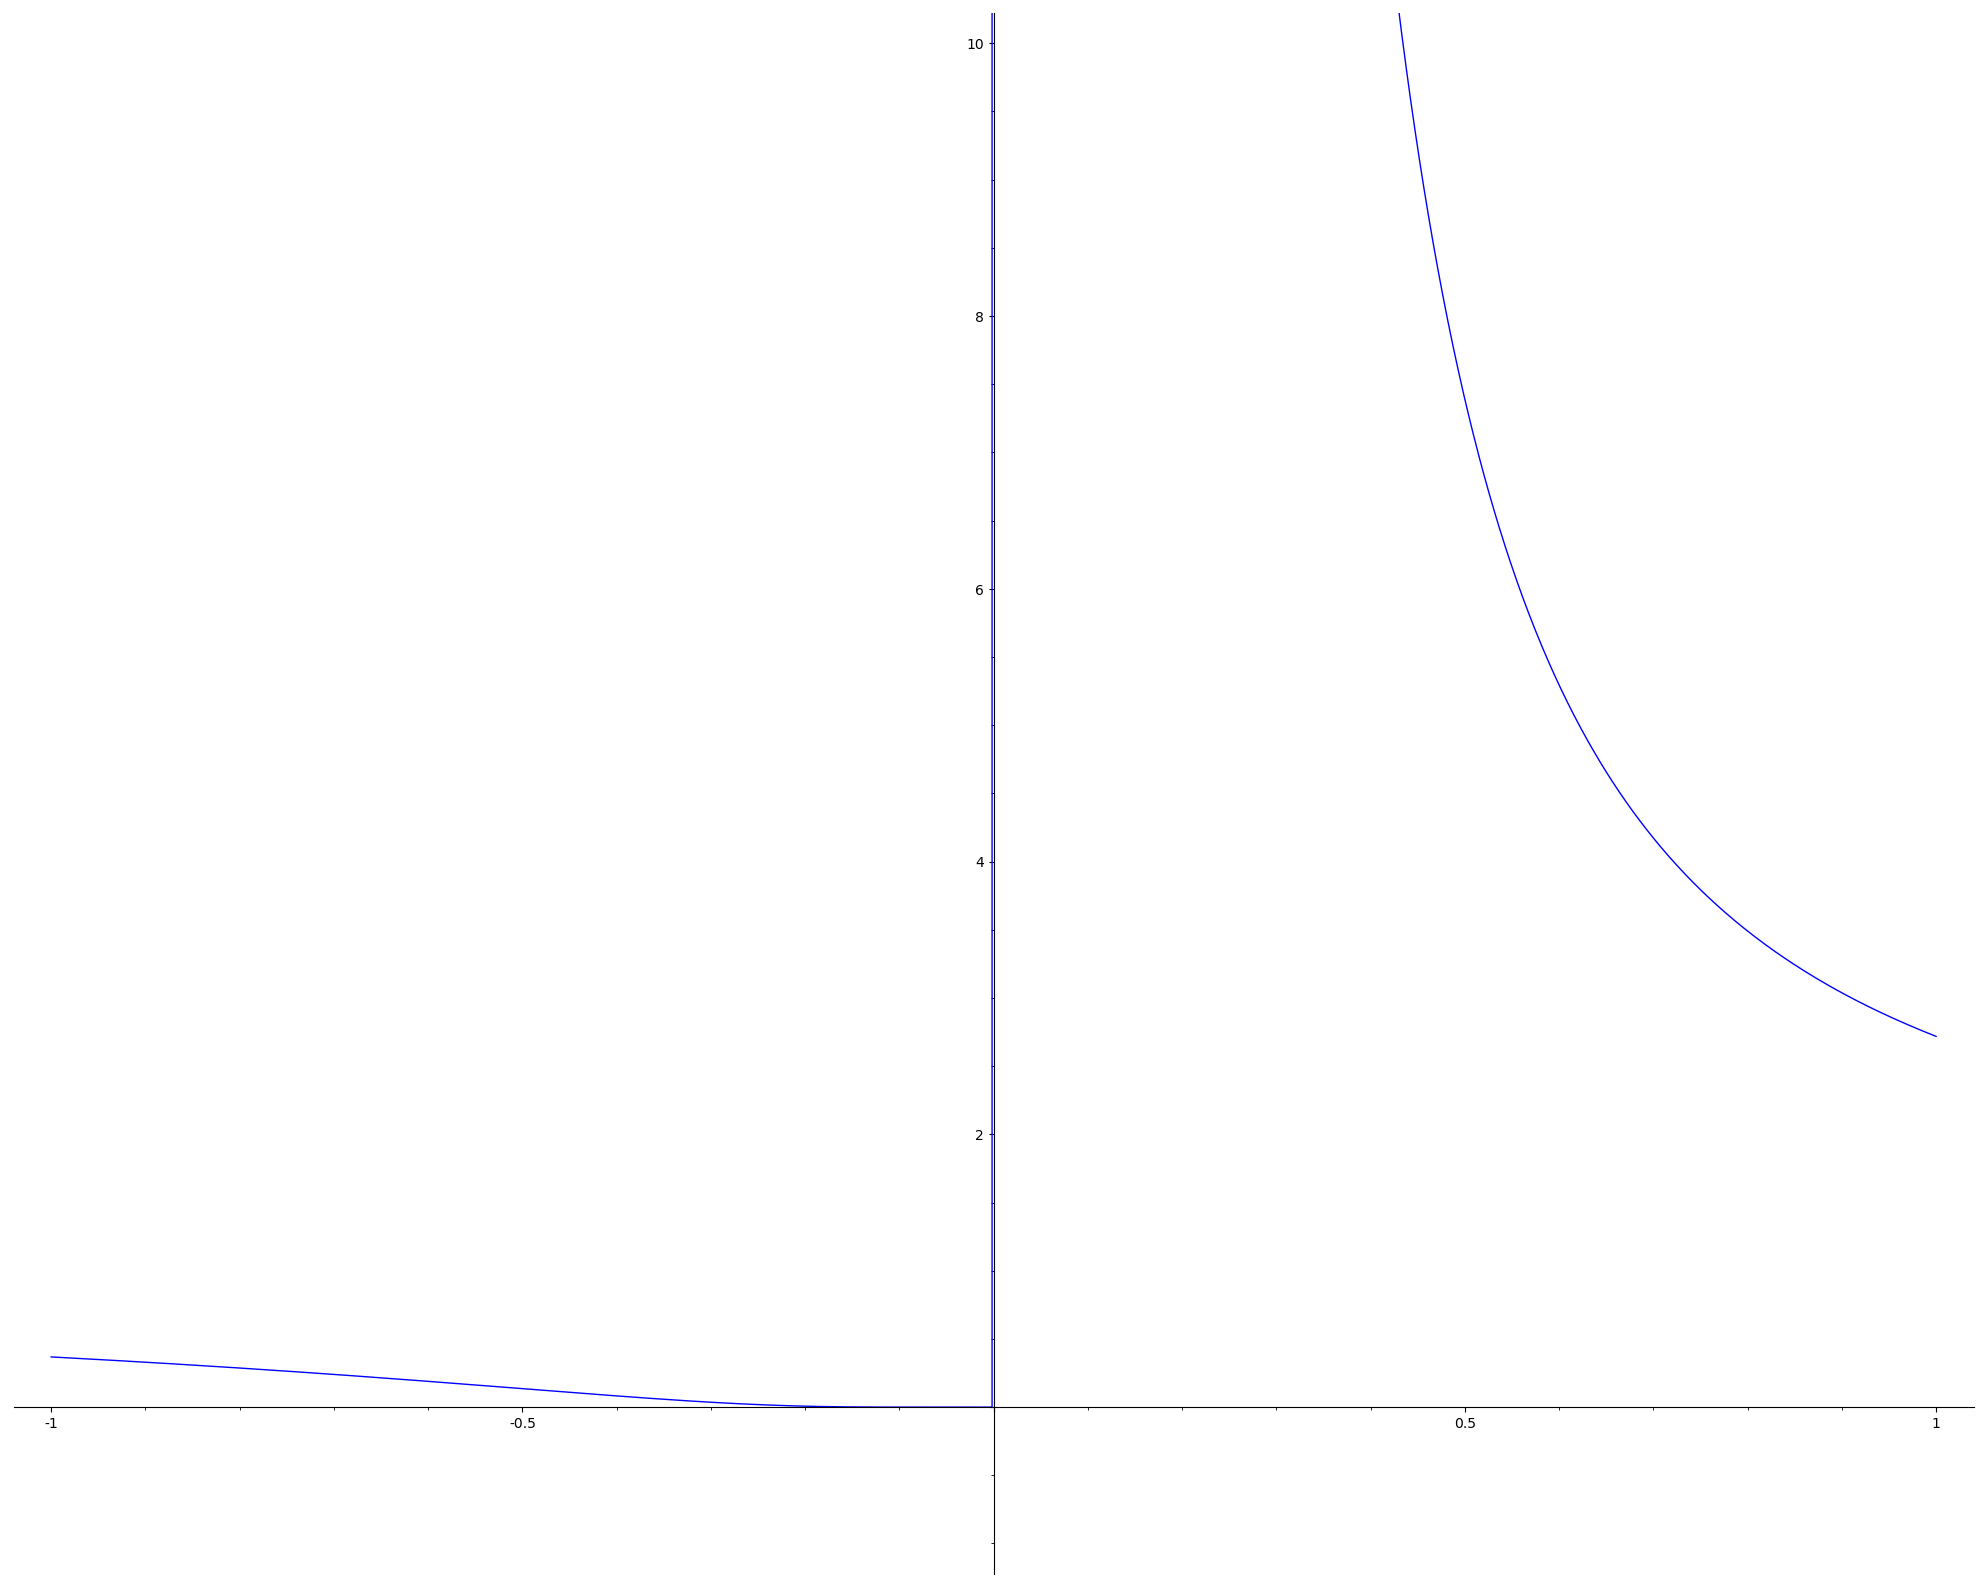

In [11]:
plot(exp(1/x), (x,-1,1)).show(xmin=-1, xmax=1, ymin=-1, ymax=10)

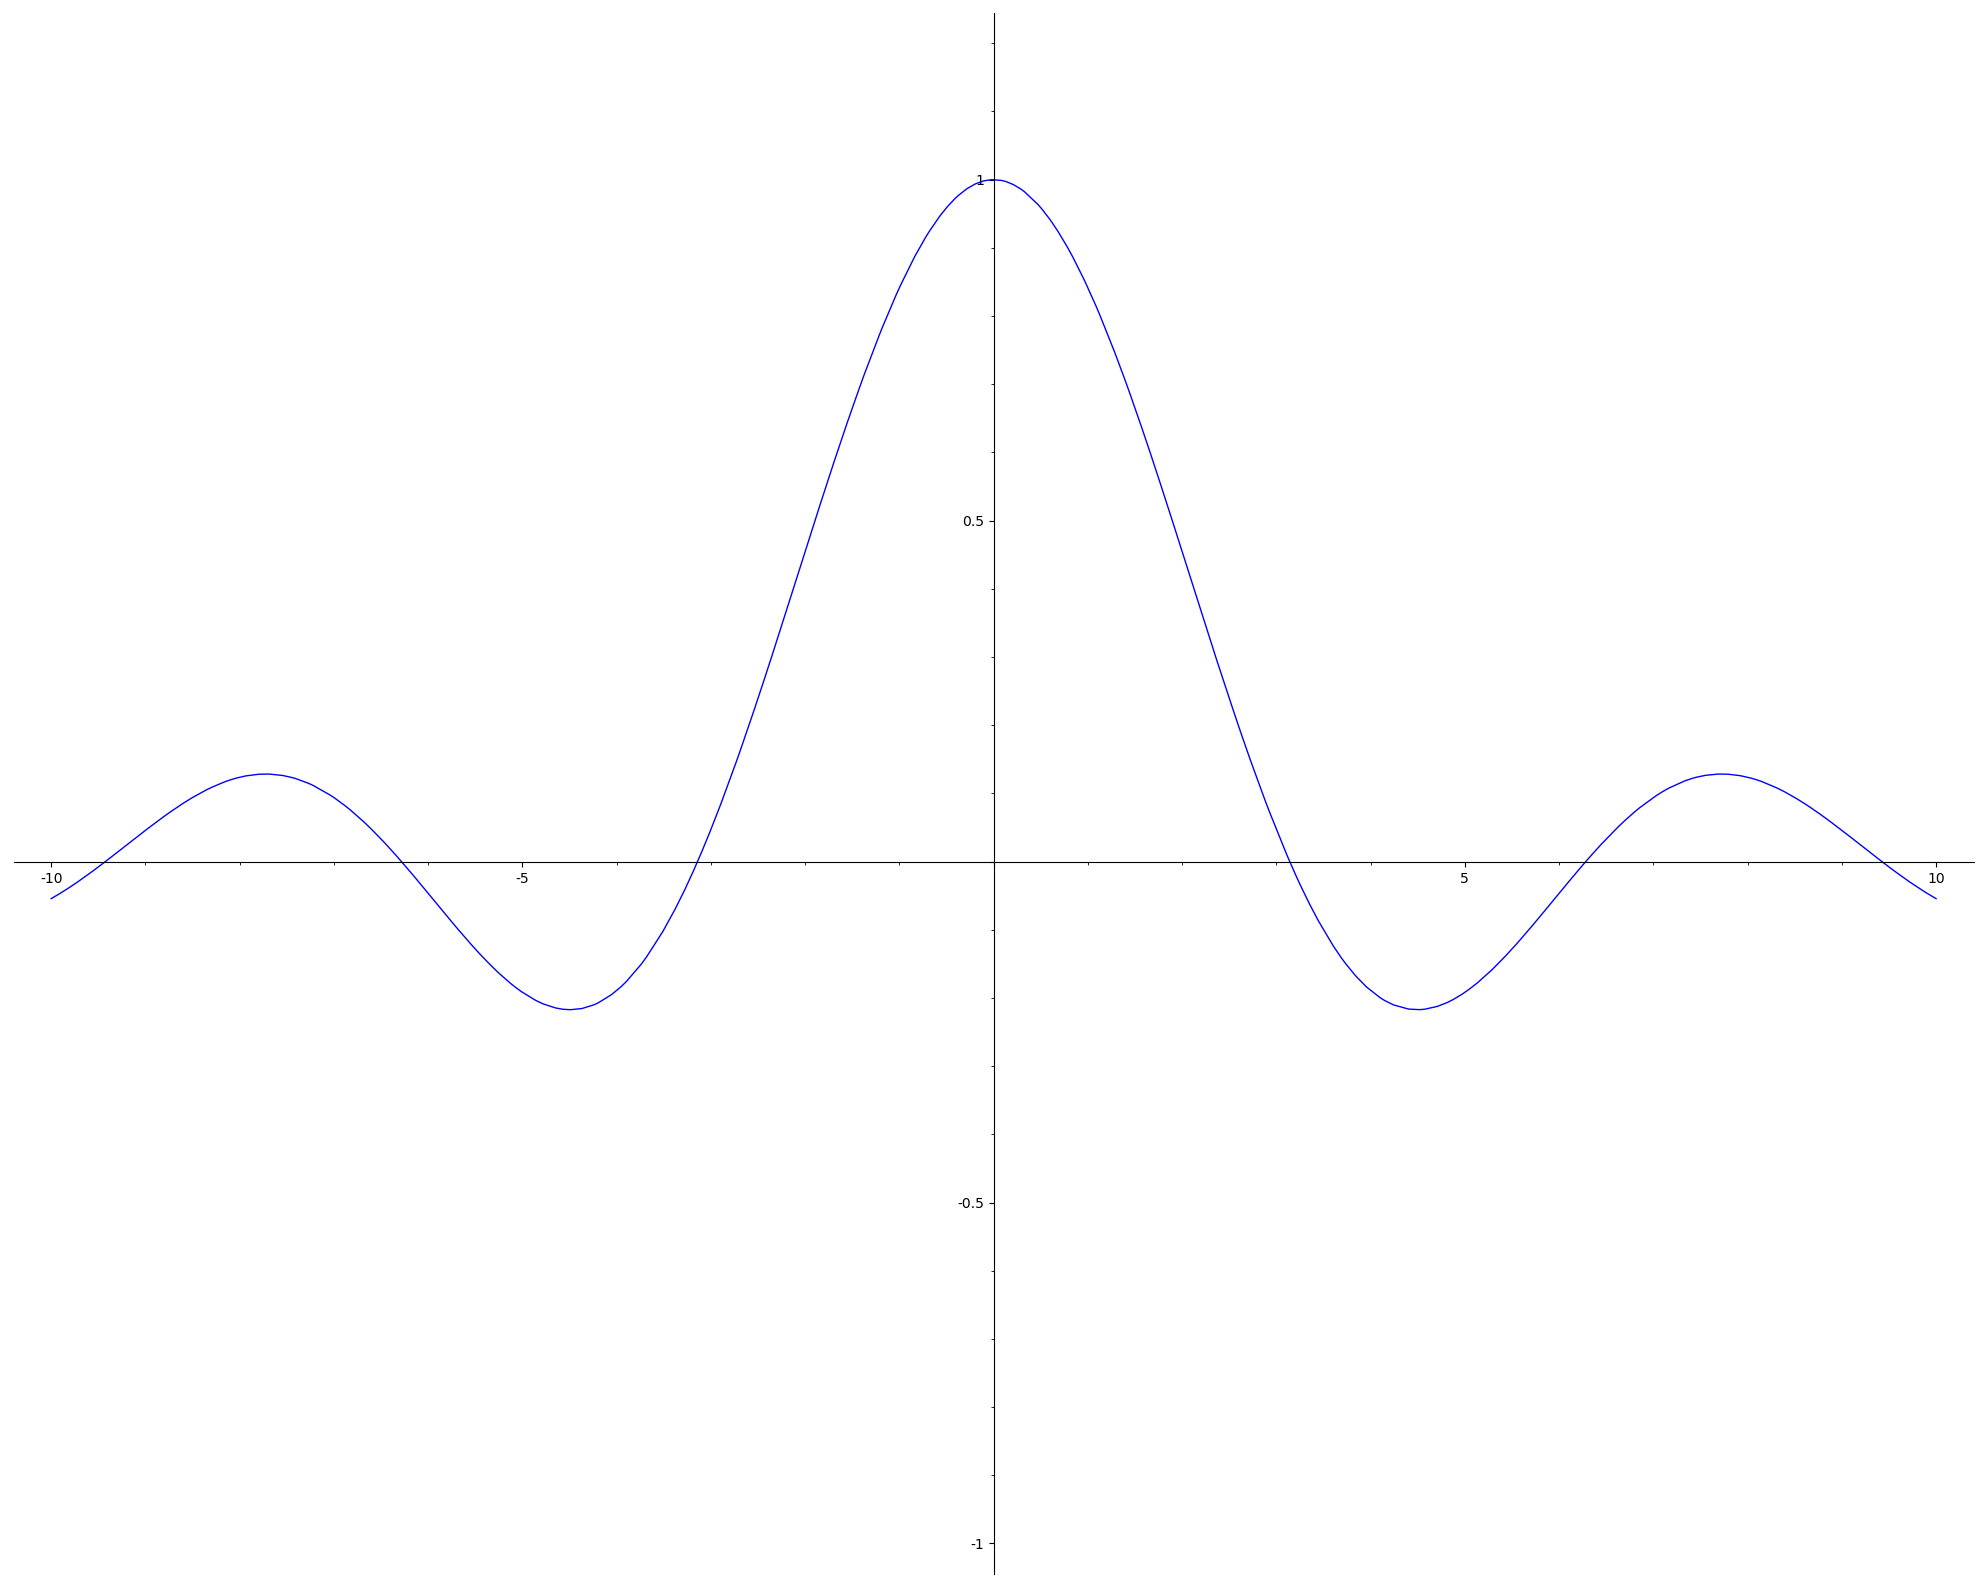

In [12]:
plot(sin(x)/x, (x,-10,10)).show(xmin=-10, xmax=10, ymin=-1, ymax=1.2)

### Residue

Example
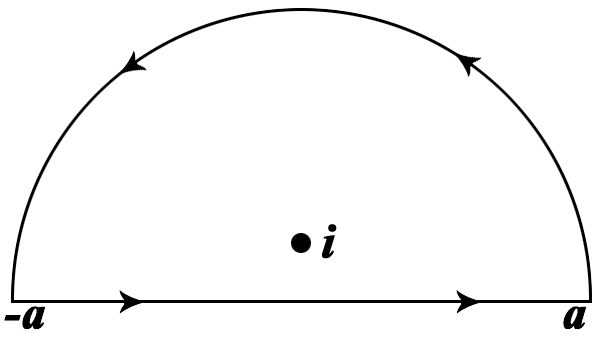

$$ \int_{-\infty}^\infty {e^{itx} \over x^2+1}\,dx = \int_{-\infty}^\infty \frac{e^{itz}}{2i}\left(\frac{1}{z-i}-\frac{1}{z+i}\right)\,dx = \int_{-\infty}^\infty \frac{e^{itz}}{2i}\left(\frac{1}{z-i}\right)\,dx = \pi e^{-t} =  \int_{\mbox{straight}}+\int_{\mbox{arc}}
$$
$$ t >0, a->\infty: \int_{\mbox{arc}} = 0 ; \int_{-\infty}^\infty{e^{itz} \over z^2+1}\,dz=\pi e^t, $$

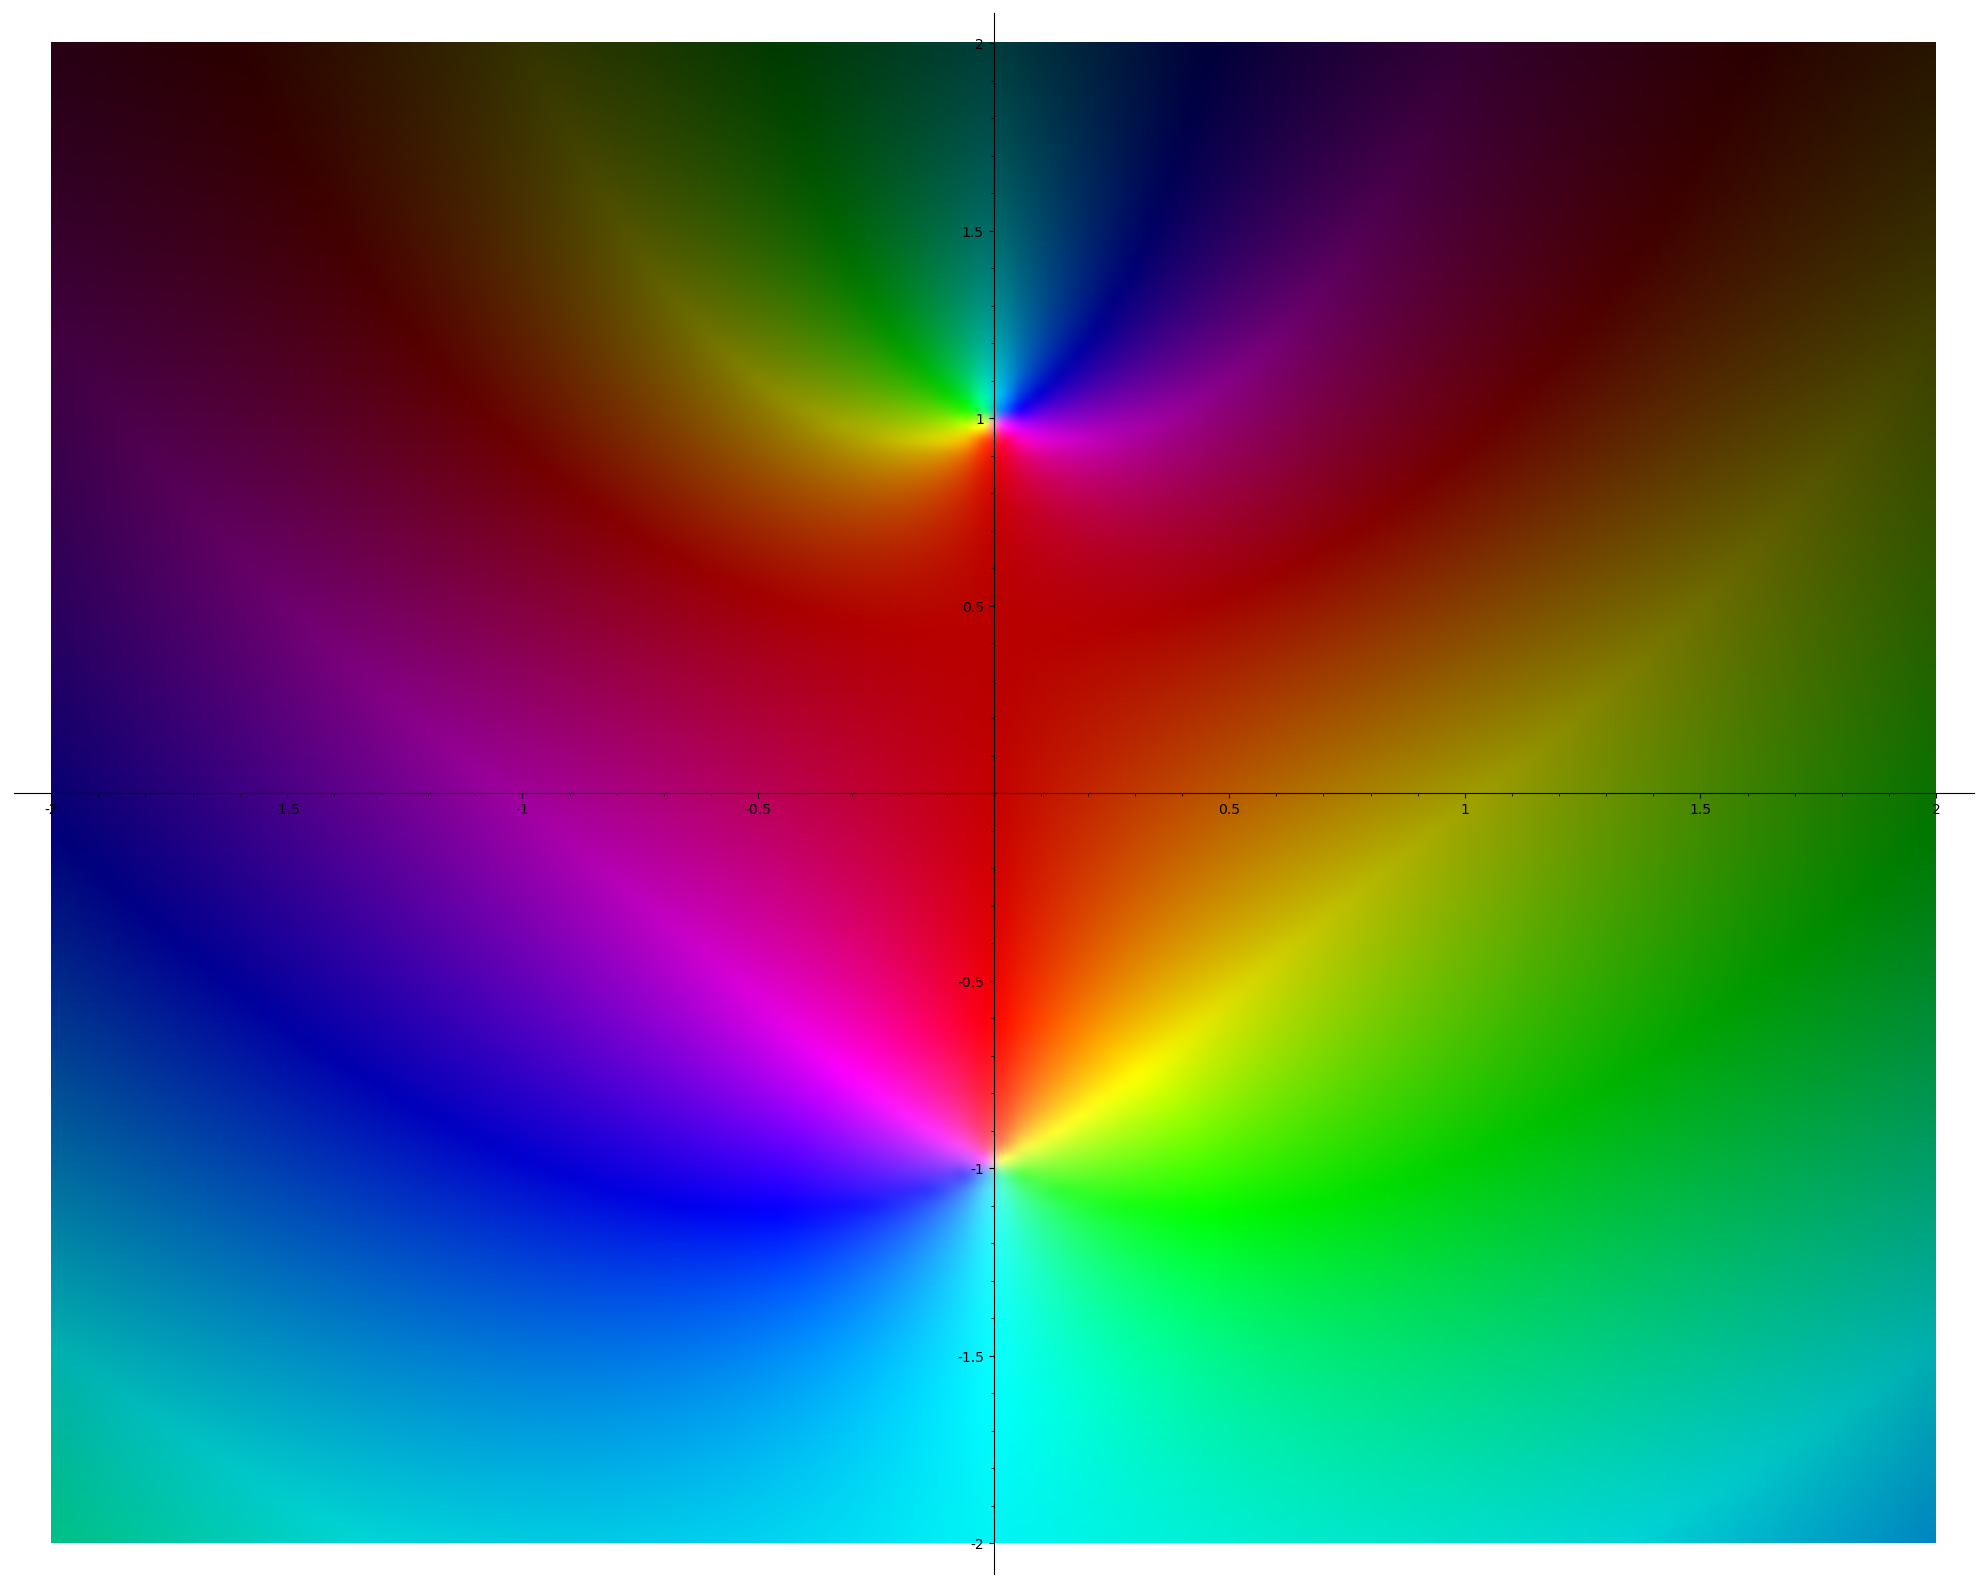

In [13]:
# assume t=1
complex_plot(lambda z: exp(I*z)/(z**2+1), (-2,2), (-2,2))

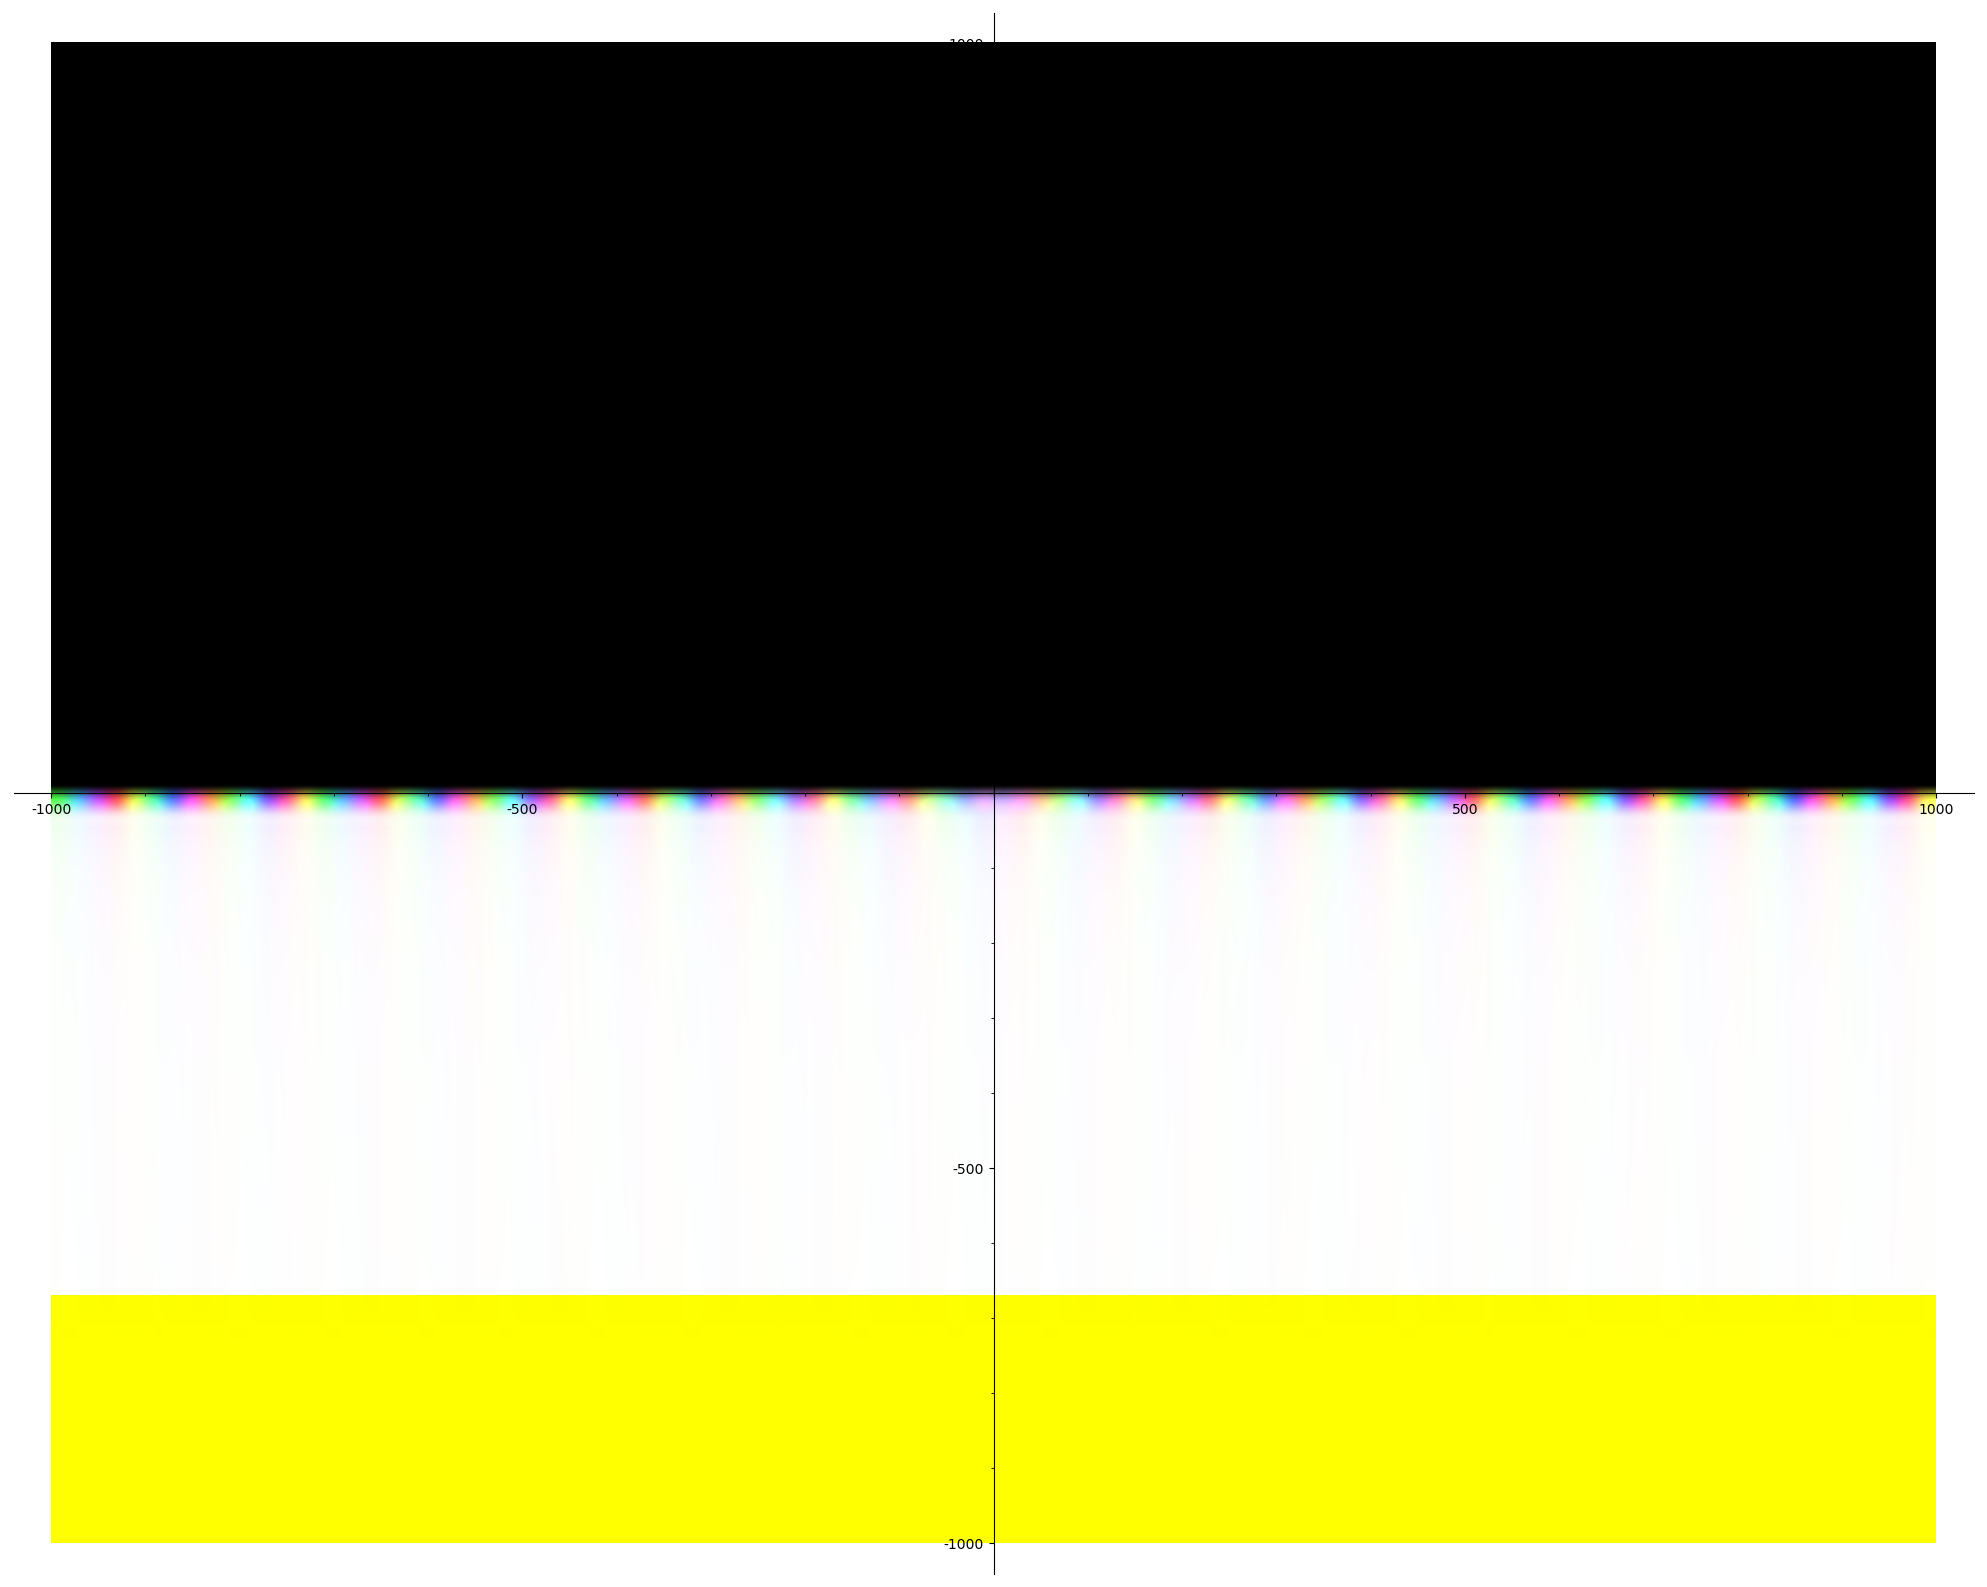

In [14]:
complex_plot(lambda z: exp(I*z)/(z+I), (-1000,1000), (-1000,1000))